 <h1><center>Frequency distribution analysis of Holy Bible and Holy Quran</center></h1>  

# Lesson Goals
In this lesson we will explore the potential of Apache Spark within Python API in exploring text data. Counting the frequency of specific words in the list can provide illustrative data. We will walkthrough on different libraries of Spark for data preparation and creating Resilient Distribution Dataset(RDD). We will end this lesson by visualizing our processed data.

# Prerequests 
  1. install Apache Spark
  2. Install Anaconda
  3. Install SpaCy Library
  4. Install WordCloud Library
  
  NB:make sure Jupyter Notebook and Spark running

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import re
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pyspark import SparkContext, SparkConf

In [2]:
#SparkContext is main entry point for Spark functionality
#Configure spark parameter to use local machine
conf = SparkConf().setAppName("ProjectWC").setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)

In [3]:
#A Spark context can be used to create Resilient Distributed Datasets (RDDs) on a cluster.
# import your downloaded Bible & Quran text file
bRDD = sc.textFile("bible.txt")
qRDD = sc.textFile("quran.txt")

In [4]:
# 'Collect' return a list that contains all of the elements in the RDD
bRDD.sample(withReplacement = False, fraction = 0.0002, seed = 80).collect()

['17:25 And Ishmael his son was thirteen years old, when he was',
 'they shall go out in the jubile.',
 '',
 'put to death.',
 '',
 '',
 'behind, which were so faint that they could not go over the brook Besor.',
 '',
 '6:9 So he built the house, and finished it; and covered the house with',
 'kings of Israel?',
 'that the king of Babylon had made Gedaliah governor, there came to',
 '',
 'bars: her king and her princes are among the Gentiles: the law is no',
 'thine head upon thee, and put on thy shoes upon thy feet, and cover not',
 'darkness upon thy land, saith the Lord GOD.',
 '',
 '2:6 The law of truth was in his mouth, and iniquity was not found in his',
 '',
 '',
 '20:33 Therefore in the resurrection whose wife of them is she? for seven',
 '3:1 If ye then be risen with Christ, seek those things which are above,',
 '',
 '']

In [5]:
qRDD.sample(withReplacement = False, fraction = 0.0002, seed = 80).collect()

['',
 'and the sun and the moon-beheld them make obeisance to me!"3',
 '',
 '',
 'shall be fruitless in this world, and in the next: they shall be consigned to']

In [6]:
# Let's count the number of lines in each RDD
print('The number of lines in the Bible text file is {}'.format(bRDD.count()))

The number of lines in the Bible text file is 109408


In [8]:
print('The number of lines in the quran text file is {}'.format(qRDD.count()))

The number of lines in the quran text file is 26044


In [9]:
# Regular Expression(re) from Python Will changes them to lower letter and removes leading or trailing spaces.
# removing special characters and numbers
import re

def wordclean(x):
    return re.sub("[^a-zA-Z0-9\s]+","", x).lower().strip()

In [10]:
x = [" imagine that you have 26 constants, labeled A through Z. Each constant is assigned a value in the following way: A = 26^1, B = 25^2, C = 24^3, D = 23^2 and so on till Z = 1^26. find the exact numerical value to the following equation: (Y-A)*(Y-B)*(Y-C)...*(Y-Z). "
     "  He said, 'I am sure you know the answer equals 0 since (Y-Y) is zero'  "]

for i in x: 
  print(wordclean(i))

imagine that you have 26 constants labeled a through z each constant is assigned a value in the following way a  261 b  252 c  243 d  232 and so on till z  126 find the exact numerical value to the following equation yaybycyz   he said i am sure you know the answer equals 0 since yy is zero


In [11]:
# Apply wordclean to our Bible and Quran RDDS. We use the map RDD method.
bRDDList = bRDD.map(lambda x : wordclean(x))
qRDDList = qRDD.map(lambda x : wordclean(x))

In [12]:
bRDDList.take(60)[41: ]

['',
 '114 and god said let there be lights in the firmament of the heaven to',
 'divide the day from the night and let them be for signs and for',
 'seasons and for days and years',
 '',
 '115 and let them be for lights in the firmament of the heaven to give',
 'light upon the earth and it was so',
 '',
 '116 and god made two great lights the greater light to rule the day',
 'and the lesser light to rule the night he made the stars also',
 '',
 '117 and god set them in the firmament of the heaven to give light upon',
 'the earth',
 '',
 '118 and to rule over the day and over the night and to divide the',
 'light from the darkness and god saw that it was good',
 '',
 '119 and the evening and the morning were the fourth day',
 '']

In [13]:
qRDDList.take(60)[41: ]

['',
 '',
 '',
 '',
 '1 the word sura occurs nine times in the koran viz sur ix 65 87 125',
 '128 xxiv 1 xlvii 22 twice ii 21 x 39 but it is not easy to',
 'determine whether it means a whole chapter or part only of a chapter or is',
 'used in the sense of revelation see weils mohammed der prophet pp 361',
 '363 it is understood by the muhammadan commentators to have a primary',
 'reference to the succession of subjects or parts like the rows of bricks in',
 'a wall the titles of the suras are generally taken from some word occurring',
 'in each which is printed in large type throughout where practicable',
 '',
 '2 this formulabismillahi rrahmani rrahimis of jewish origin it was in',
 'the first instance taught to the koreisch by omayah of taief the poet who',
 'was a contemporary with but somewhat older than muhammad and who during',
 'his mercantile journeys into arabia petra and syria had made himself',
 'acquainted with the sacred books and doctrines of jews and christians kitab',


In [15]:
# Apply a transformation for each element of the RDD by its spaces.
# Aply Python's string split() & Spark flatMap function respectively.
bRDDwords = bRDDList.flatMap( lambda x: x.split(" "))
qRDDwords = qRDDList.flatMap( lambda x: x.split(" "))

In [16]:
# Display sample words from each RDD
bRDDwords.sample(withReplacement = False, fraction = 0.00001, seed = 90).collect()


['thy', 'the', 'shall', 'she', '', 'that', 'earth', 'by']

In [17]:
# Display sample words from each RDD
qRDDwords.sample(withReplacement = False, fraction = 0.00001, seed = 90).collect()

['forth', 'not', 'those']

In [18]:
# Apply filter to remove spaces.
bRDDwords = bRDDwords.filter(lambda x: len(x) != 0)
qRDDwords = qRDDwords.filter(lambda x: len(x) != 0)

In [19]:
# Creat word pairs to count the frequency of words
bRDDwordPairs =  bRDDwords.map(lambda x: (x,1))
qRDDwordPairs =  qRDDwords.map(lambda x: (x, 1))

In [20]:
# Display a wordpair using Take function from spark
bRDDwordPairs.take(10)

[('genesis', 1),
 ('11', 1),
 ('in', 1),
 ('the', 1),
 ('beginning', 1),
 ('god', 1),
 ('created', 1),
 ('the', 1),
 ('heaven', 1),
 ('and', 1)]

In [21]:
# Display a wordpair for quran using Take function from spark
qRDDwordPairs.take(10)

[('sura1', 1),
 ('xcvithick', 1),
 ('blood', 1),
 ('or', 1),
 ('clots', 1),
 ('of', 1),
 ('blood', 1),
 ('i', 1),
 ('mecca19', 1),
 ('verses', 1)]

In [22]:
# reduceByKey() run a function for each partition on a per-key basis and then across the partitions.
bRDDwordCount =  bRDDwordPairs.reduceByKey(lambda a, b : a + b)
qRDDwordCount =  qRDDwordPairs.reduceByKey(lambda a, b : a + b)


In [23]:
# Display the frequency of each work in bible
bRDDwordCount.take(10)

[('in', 12724),
 ('created', 47),
 ('earth', 987),
 ('12', 99),
 ('was', 4524),
 ('form', 28),
 ('upon', 2750),
 ('of', 34732),
 ('spirit', 505),
 ('said', 3999)]

In [24]:
# Display the frequency of each work in quran
qRDDwordCount.take(10)

[('sura1', 5),
 ('of', 6439),
 ('i', 739),
 ('verses', 193),
 ('in', 2928),
 ('name', 190),
 ('compassionate', 120),
 ('merciful2', 1),
 ('thou', 813),
 ('thy', 488)]

In [25]:
# Apply The takeOrdered()  function to obtain the first n elements of the RDD either their natural order or a custom comparator. 
# avoid using first() or take() function where both give you Ascending or descending order depend on the list. 
# Apply -x[1] to make it in descending order.
bRDDwordCount.takeOrdered(10, lambda x : -x[1])

[('the', 64096),
 ('and', 51764),
 ('of', 34732),
 ('to', 13642),
 ('that', 12928),
 ('in', 12724),
 ('he', 10422),
 ('shall', 9840),
 ('unto', 8997),
 ('for', 8996)]

In [27]:
qRDDwordCount.takeOrdered(10, lambda x : -x[1])

[('the', 10871),
 ('and', 8450),
 ('of', 6439),
 ('to', 4913),
 ('god', 3169),
 ('they', 2979),
 ('in', 2928),
 ('is', 2766),
 ('a', 2485),
 ('shall', 2331)]

In [28]:
# remove stop words from our RDDs using SpaCy STOP_WORDS
bRDDwordCount = bRDDwordCount.filter(lambda x : x[0] not in STOP_WORDS)
qRDDwordCount = qRDDwordCount.filter(lambda x : x[0] not in STOP_WORDS)

In [29]:
bRDDwordCount.takeOrdered(10, lambda x : -x[1])

[('shall', 9840),
 ('unto', 8997),
 ('lord', 7830),
 ('thou', 5474),
 ('thy', 4600),
 ('god', 4443),
 ('said', 3999),
 ('ye', 3982),
 ('thee', 3826),
 ('man', 2613)]

In [31]:
qRDDwordCount.takeOrdered(10, lambda x : -x[1])

[('god', 3169),
 ('shall', 2331),
 ('ye', 1798),
 ('hath', 951),
 ('lord', 919),
 ('said', 887),
 ('thou', 813),
 ('thee', 638),
 ('day', 531),
 ('thy', 488)]

In [32]:
# Search a unique words in RDD
uwordsbible = bRDDwordCount.count()
uwordsquran = qRDDwordCount.count()

In [33]:
print(" The total number of unique words in the bible is {} while the unique number of words in the Quran is {}".\
      format(uwordsbible, uwordsquran ))

 The total number of unique words in the bible is 16669 while the unique number of words in the Quran is 11286


## TF-IDF
An introduction to TF-IDF
TF-IDF stands for “Term Frequency — Inverse Data Frequency”. First, we will learn what this term means mathematically.

Term Frequency (tf): gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.
<img src="https://cdn-media-1.freecodecamp.org/images/1*HM0Vcdrx2RApOyjp_ZeW_Q.png" />
 
Inverse Data Frequency (idf): used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. It is given by the equation below.
<img src="https://cdn-media-1.freecodecamp.org/images/1*A5YGwFpcTd0YTCdgoiHFUw.png" />

Combining these two we come up with the TF-IDF score (w) for a word in a document in the corpus. It is the product of tf and idf:

<img src="https://cdn-media-1.freecodecamp.org/images/1*nSqHXwOIJ2fa_EFLTh5KYw.png" />




In [34]:
# calculate total word in bible
Tnijb = bRDDwordCount.map(lambda a: a[1]).reduce(lambda a, b : a + b)

print("Total number of words in the Bible: {}".format(Tnijb))

Total number of words in the Bible: 367091


In [36]:
# calculate total word in bible
Tnijq = qRDDwordCount.map(lambda a: a[1]).reduce(lambda a, b : a + b)

print("Total number of words in the Quran: {}".format(Tnijq))

Total number of words in the Quran: 84043


In [40]:
# Term Frequency
TFb = Tnijb/uwordsbible

TFq = Tnijq/uwordsquran

In [41]:
print('Average word frequency in the Bible is  {} while the average word frequency in the Quran is {}'.\
      format(round(TFb,1), round(TFq,1)))

Average word frequency in the Bible is  22.0 while the average word frequency in the Quran is 7.4


In [43]:
# Visualizing the distribution of the words
# Changing the word frequencies in RDDs to numpy arrays and ploting  using matplotlib.

bRDDwordCount_numeric_values = bRDDwordCount.map(lambda x : x[1]).collect()
qRDDwordCount_numeric_values = qRDDwordCount.map(lambda x : x[1]).collect()

In [44]:
# Display first ten elements of bible list

bRDDwordCount_numeric_values[:10]


[47, 987, 99, 28, 505, 3999, 1511, 94, 720, 307]

In [46]:
# Display first ten elements of quran list

qRDDwordCount_numeric_values[:10]


[5, 193, 120, 1, 813, 488, 165, 17, 15, 27]

In [47]:
# Converting lists to numpy arrays.

bRDDwordCount_numeric_values_np = np.array(bRDDwordCount_numeric_values)
qRDDwordCount_numeric_values_np = np.array(qRDDwordCount_numeric_values)

In [48]:
# Check data type

type(bRDDwordCount_numeric_values_np)

numpy.ndarray

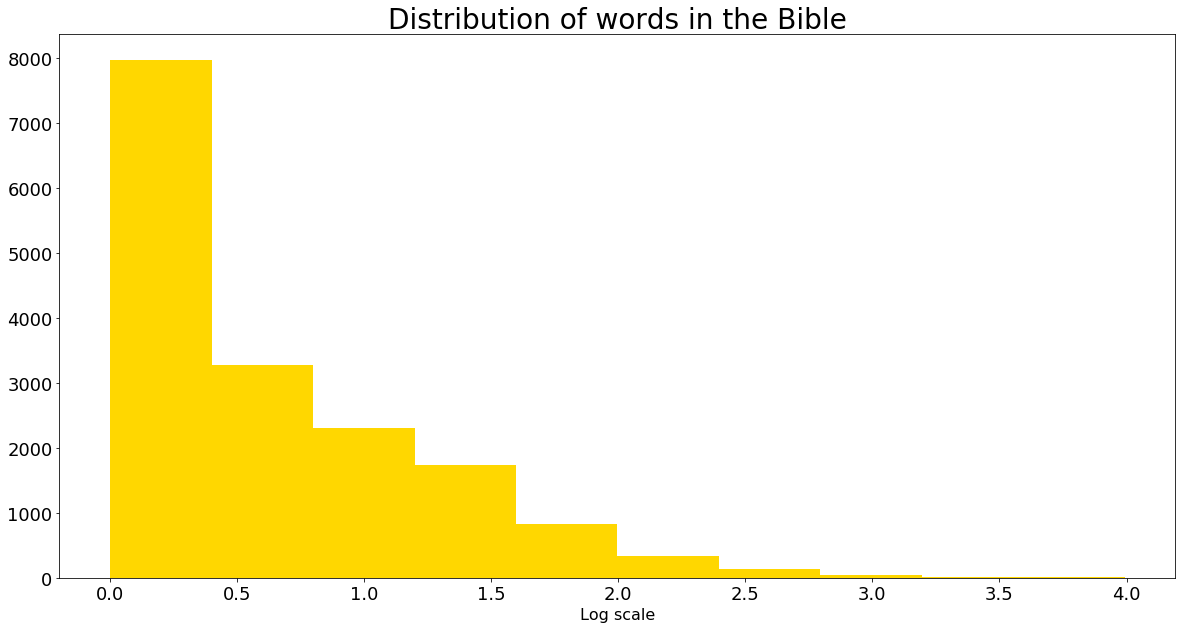

In [50]:
plt.figure(figsize = (20, 10))
plt.hist(np.log10(bRDDwordCount_numeric_values_np), color = "gold")
plt.title("Distribution of words in the Bible", fontsize = 28)
plt.xlabel("Log scale", fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [51]:
plt.figure(figsize = (20, 10))
plt.hist(np.log10(qRDDwordCount_numeric_values_np), color = "pink")
plt.title("Distribution of words in the Quran", fontsize = 28)
plt.xlabel("Log scale", fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

NameError: name 'qDDwordCount_numeric_values_np' is not defined

<Figure size 1440x720 with 0 Axes>

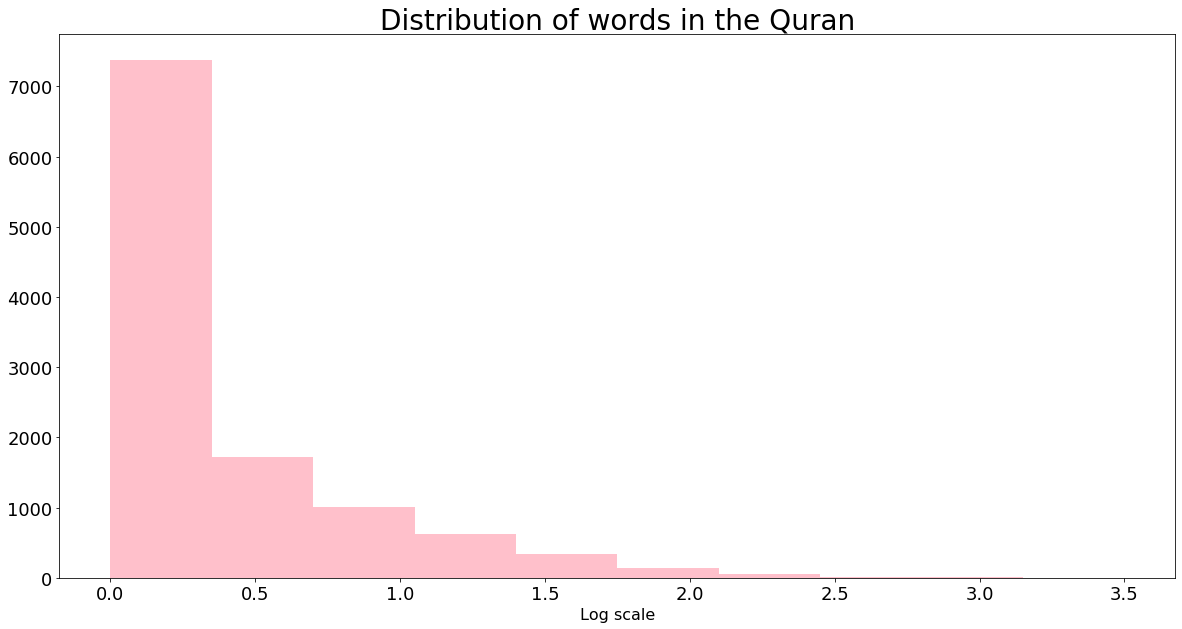

In [52]:
plt.figure(figsize = (20, 10))
plt.hist(np.log10(qRDDwordCount_numeric_values_np), color = "pink")
plt.title("Distribution of words in the Quran", fontsize = 28)
plt.xlabel("Log scale", fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

### Note : 
 The above two distribution graph showed that most words have frequencies of less than 5.

In [53]:
# Create a dataframe using the top 10 most common words.

bible_top10_words = bRDDwordCount.takeOrdered(10, lambda x : -x[1])
quran_top10_words = qRDDwordCount.takeOrdered(10, lambda x : -x[1])
bwords = [x[0] for x in bible_top10_words]
bcount = [x[1] for x in bible_top10_words]
bdict = {"word": bwords, "frequency": bcount}

qwords = [x[0] for x in quran_top10_words]
qcount = [x[1] for x in quran_top10_words]
qdict = {"word": qwords, "frequency": qcount}

df_bible = pd.DataFrame(bdict)
df_quran = pd.DataFrame(qdict)

In [54]:
df_bible.head()

,word,frequency
0,shall,9840
1,unto,8997
2,lord,7830
3,thou,5474
4,thy,4600


In [55]:
df_quran.head()

,word,frequency
0,god,3169
1,shall,2331
2,ye,1798
3,hath,951
4,lord,919


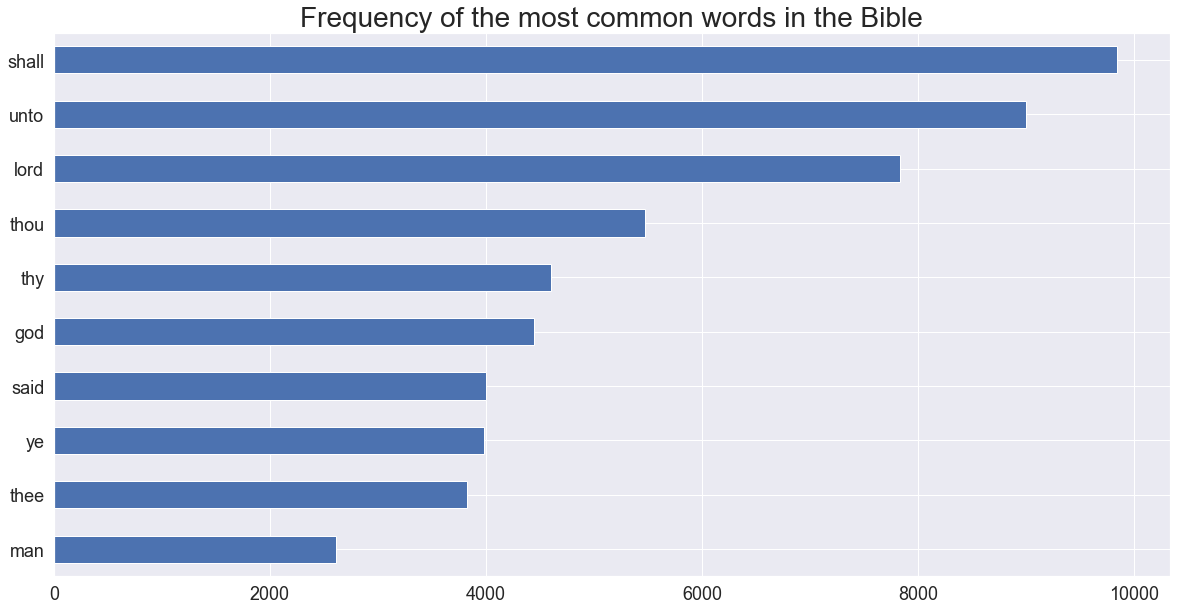

In [74]:
# Create a bar chart of the most 10 common words from Bible scripture.

my_plot = df_bible.plot(figsize = (20, 10), 
              x = "word", y = "frequency", kind  = "barh", legend = False )

my_plot.invert_yaxis()

plt.title("Frequency of the most common words in the Bible", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylabel("")
plt.show()

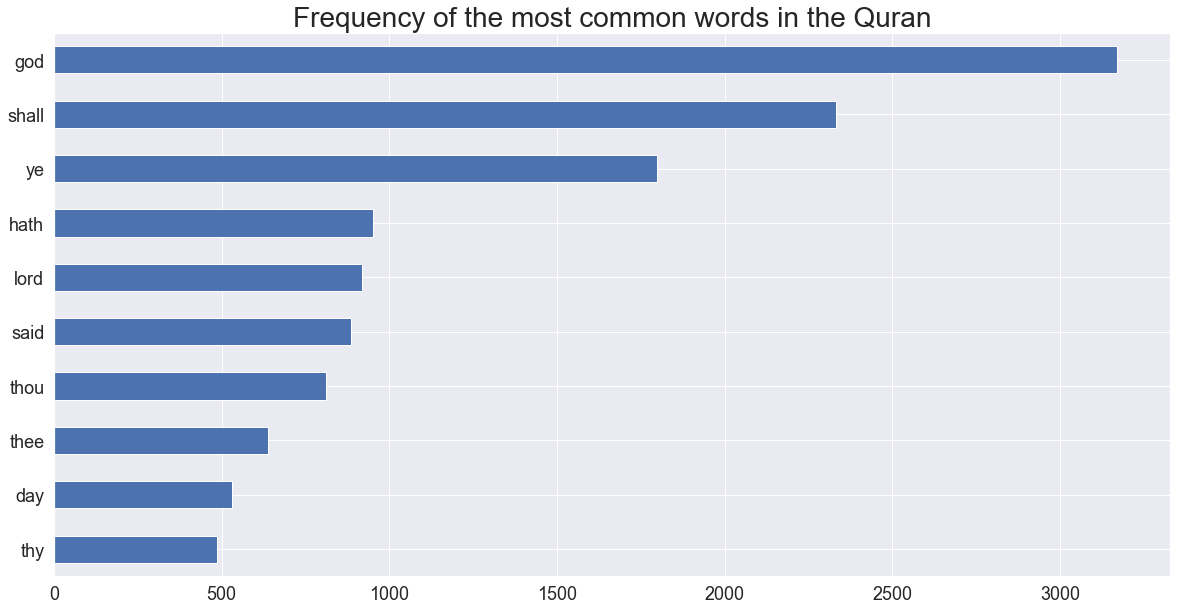

In [73]:
# Create a bar chart of the most 10 common words from Quran scripture.

my_plot = df_quran.plot(figsize = (20, 10), 
              x = "word", y = "frequency", kind  = "barh", legend = False )

my_plot.invert_yaxis()

plt.title("Frequency of the most common words in the Quran", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylabel("")
plt.show()

# Further reading


1.Apache Spark [link](http://spark.apache.org/examples.html/).

2.Metamorphosis by Franz Kafka [link](http://www.gutenberg.org/ebooks/5200).
 
3.Hadoop with Python by Zach Radtka, Donald Miner [link](https://www.oreilly.com/library/view/hadoop-with-python/9781492048435/ch04.html)
 
 
 
# Summary
In this tutorial, you discovered how to analyzed unstructure data(text) using Spark. focused on a Python API of pyspark module. 

Specifically, you learned:

How to launch Spark in Python Jupyter notebook.
How to create Resiliance Distribution Datasets(RDDs).
How to take a step up and use the more sophisticated methods in the Spark library.
How to prepare text for analysis.
How to develop frequency distribution and visualized it using python library.